# 機械学習や統計処理, その前に知っておきたい現代統計学のパラダイム
「AI」と名前がついた本を片手に, Pythonが提供している強力なパッケージを使えば, 誰でも「機械学習」ができるようになります.

しかし, 機械学習や統計処理のバックグラウンドとなる統計学の基礎を抑えておかないと, 自分が何をやっているのかがわからないまま, 表示されたモデル改善の指標や数値にただ一喜一憂することになります.

そこで, 導入として現代統計学の枠組みを説明することから始めます. まずは, 現代統計学の**「記述統計」**と**「推測統計」**という二つの側面について説明し, そこから**確率モデル**とはなにか・そして自分たちが作成を目指す**統計モデル**とはなにかを把握することを目指します.

数式がいくつか出てきますが, 必要最低限に留めています. 難解な文章にして煙に撒こうという意図は全くありません. この資料で重要なのは全体像を把握することなので, とりあえず細部は読み飛ばして後々必要になったら戻ってくる, くらいの気軽な気持ちで読んでください.

# 1. 記述統計
**記述統計(*descriptive statistics*)**とは要するに, 手元にあるデータを, 自分達に理解できるような形で要約する技術のことです.

データを要約する様々な指標（平均やバラツキなど）は**統計量**と呼ばれます.

## 1.1 代表的な統計量

### 1.1.1. 一変数統計量

例えとして、教室にいる学生の身長の特徴について知りたいとします.

#### 標本平均
ある学生の身長が155cmだったとき, その身長データを$x_i = 155$と表すこととします. こうして身長を測定して得られた数値は, $x_1, x_2, ... x_n$と表すことができます.
このようにして集められたデータは**標本**(*Sample*)と呼びます.このとき, 標本の総和を標本数で割ると, **標本平均**(*Sample Mean*)がわかります.
$$
\overline{X} = \frac{x_1 + x_2, ...  + x_n}{n}
$$
#### 標本分散
また, データのバラツキを示す指標として, **標本分散**(*Sample Variance*)があります. それぞれのデータの平均からのズレを二乗して, その平均をとったものです. 
$$
Var(X) = \frac{1}{n}\sum_{i}^n (x_i - \overline{X})^2
$$
二乗する理由は, 負のズレも正のズレも平均からの距離として正しくカウントするためです.

#### 標準偏差
標本分散は二乗しているため, もとの単位より極端にズレが強調されてしまいます.

そこで, バラツキをもとの単位で知りたい場合には, 分散の平方根である**標準偏差**(*Standard Deviation*)が用いられます.
$$
sd(X) = \sqrt{Var(X)} = \sqrt{\frac{1}{n}\sum_{i}^n (x_i - \overline{X})^2}
$$

### 1.1.2. 多変数統計量
#### 標本共分散
二つ以上の変数があるとき, それらの間の関係性を知りたいことがあります.

例えば, 身長*X*がどれくらい年齢*Y*に伴って変化しているかを調べたいとします. それは**標本共分散**(*Sample Covariance*)によって調べることができます.それぞれのデータについてXからの平均からのズレ, Yからの平均からのズレを掛け合わせて, それらを総和します.

*x*と*y*が**共に**平均以上 or 以下ならプラス, 一方が平均以下で, 他方が平均以上ならマイナスになります. 要するに全体として, *X*と*Y*が共に変化(*covary*)しているなら共分散はプラス, 逆向きに変化しているならマイナスになります.
$$
Cov(X, Y) = \frac{1}{n}\sum_{i}^n (x_i - \overline{X})(y_i - \overline{Y})
$$

#### 相関係数
共分散をそれぞれの変数の標準偏差で割ったものを, **相関係数**(*Correlation Coefficient*)と呼ばれます.
$$
corr(X, Y) = \frac{sd(X)sd(Y)}{Cov(X, Y)}
$$

「相関関係を見る」という場合には, 基本的にこの指標のことを指します. 

相関係数はつねに $ -1 \le corr(X, Y) \le 1$の範囲におさまるため, 複数の変数間の関係性の強弱を比較する際に便利です. 相関係数がマイナスのとき**負の相関**, プラスのときは**正の相関**といいます.

#### 回帰係数
共分散ないし相関係数がゼロから離れていれば, 一方の変化(例えば, 年齢)に伴って他方(身長)も変化していることがわかります. ですが, **どのくらい変化**するのか, 共分散や相関係数を見るだけではわかりません.

年齢が一つ上がるにつれ, 平均身長はどれだけ上がる or 下がるのか？これに応えるのが**回帰係数**(*Regression Coefficient*)です.
$$
b_{x,y} =\frac{Cov(X, Y)}{Var(Y)}
$$
↑を*X*の*Y*への回帰係数と呼び, Yの単位あたりのXの変化を表します. 例でいうと, **データ上では**年齢*Y*が1増えるごとに, 身長*X*は平均して$b_{x,y}$だけ上がっていることになります.


# 2. 推測統計
記述統計が与えられたデータを要約するための手法だとすれば, 推測統計はそのデータを元に未観測の事象を予測, 推定する技術です.



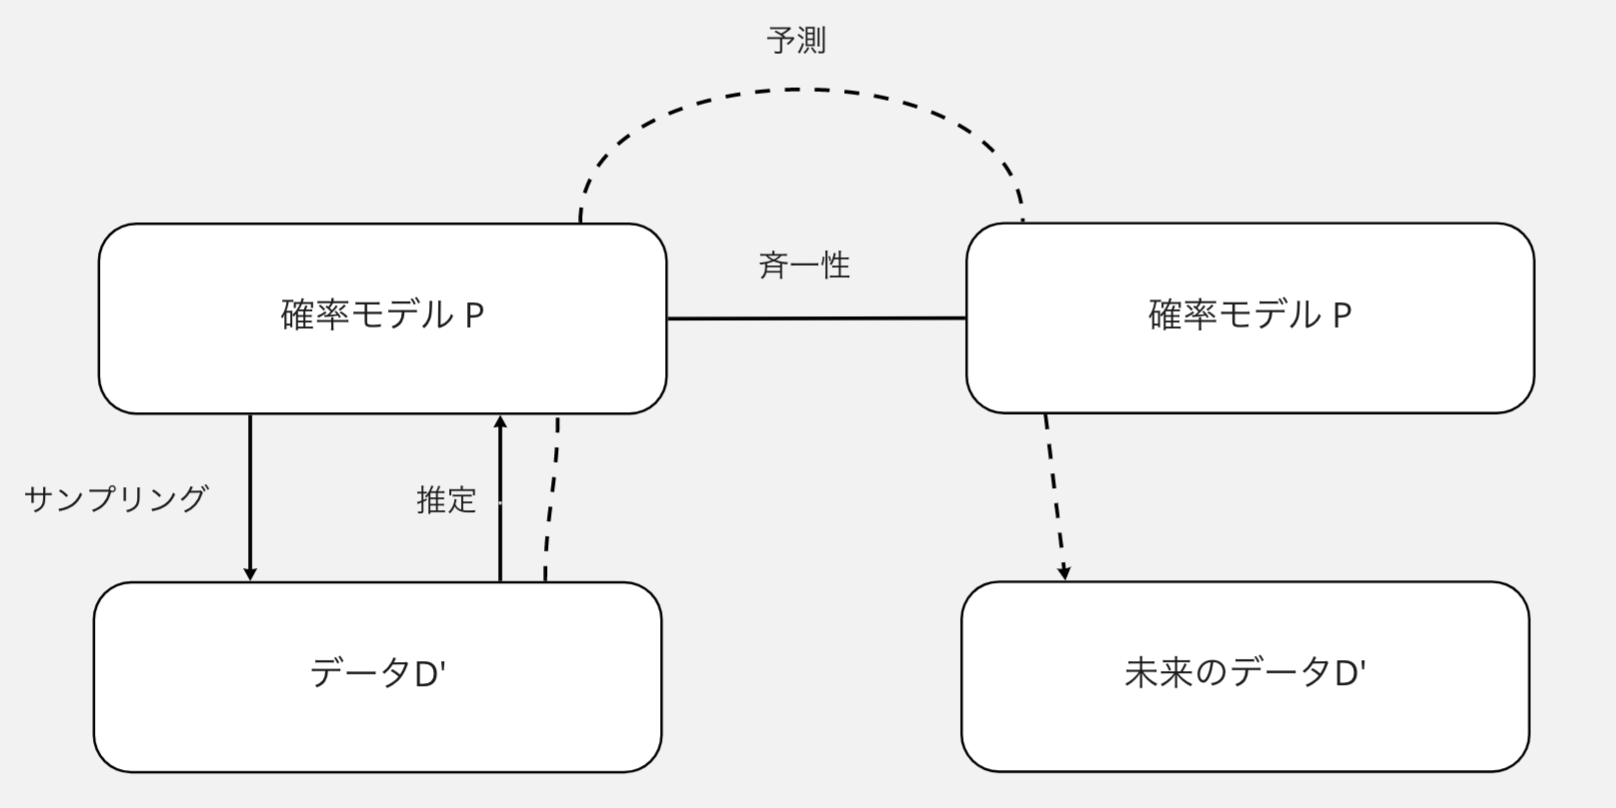

In [3]:
from IPython.display import Image
Image("./images/data-model.png")

## 2.1. 推測統計の考え方 
推測統計は上図の枠組みで語られることが多いです.

この枠組みでは, 自分たちが扱うデータはその背後にある**確率モデル**(*probability model*)から抽出されたサンプル／標本として捉えなおされます. 抽出はランダムになされるのでサンプルごとに内実は変わりますが, もととなる確率モデル自体は変わらない, という仮定です.

ただ, この確率モデル自体は観測できない(全知全能の知性を持った存在しかできない))ため, 自分たちは手元のデータをもとにそれを推測しなければなりません. そしてそのように推定された確率モデルを媒介として, 未来のデータを予測する. というのが推測統計の考え方です. 

この「データをとってくる源」のことを, **母集団**(*population*)あるいは**標本空間**(*sample space*)と呼びます. 

## 2.2. 事象
**事象**とは, 母集団の部分集合のことです. イメージを持ってもらうために, 少し例を上げてみます. 

サイコロを1回投げることを考えます. その母集団は $\omega = \{1, 2, 3, 4, 5, 6\} $となります. なので, サイコロを1回投げて偶数が出るという事象は, $\{2, 4, 6\}$と表すことができます.

 $\{1, 2, 3, 4, 5, 6\}$の中に, $\{2, 4, 6\}$は含まれているので, サイコロを1回投げて偶数が出るという事象は, 母集団の部分集合になっています.


## 2.3. 確率変数と確率分布
事象は標本空間(=母集団)の部分集合であることがわかりましたが, 一つ一つの事象に「名前」はついていません.

「サイコロを1回投げて偶数が出る確率」は, $P \{2, 4, 6\}$と表すことができますが, 「日本国民全員のうち, 18歳以上の有権者のみ」を抜き出したい場合, {20, 21, 18 ... }と列挙するのは面倒です. 

そこで, 母集団から「18歳以上の有権者」という性質を抜き出す方法として, **確率変数**(*random variable*)という考え方があります.

確率変数を導入することで, 「１８歳以上の国民」という部分集合を$Y \ge 18$と表すことができます. 部分集合には当然確率を割り当てることができるので, 全国民を無作為に選び出し, 選ばれた人が１８歳以上であるという確率は$P ( Y \ge 18)$と表すことができます.

一般に, ある確率変数$X$について, その値が$x$をとる確率は$P(X = x)$で表されます. 上の例で行けば, $P(X > 18) = 0.83$ は選ばれた人が１８歳以上の有権者である確率は83%である, ということを意味しています.
<br>
<br>
<br>
<br>
<br>
<br>

確率変数を導入することで何が嬉しいのでしょうか.

自分たちは大抵, 身長や年齢など, 何らかの属性や性質に関心があります. こうした属性を変数として表すことによって, 確率を変数の値の関数として表すことができます.

確率変数$X$の任意の値$x$に対して確率$P(x)$を与えるこの関数を, $X$の**確率分布**(*provavility distribution*)とよび, $P(X)$と表記します.

## 2.4. 連続確率変数と確率密度
性質によって, 離散値をとるか, 連続値をとるか変わってきます. 身長など, 連続的に変化する特徴は, 連続確率変数によって表すことが適切かもしれませんが, 注意点があります.

例えば, $X$を連続確率変数としたとき, それが特定の実数値$x$をとる確率$P(X = x)$はどれくらいでしょうか. 

どれだけ人口が多くても, その身長がぴったり「170.00000....cm」となるような人は1人もいません. 連続確率変数の場合, その値の確率はゼロになってしまいます.

ですが, 例えば身長169cm から 170cm の間の確率はゼロ以上となりうるかもしれません. であれば, この区間をある点へと限りなく狭めていった結果も考えることができます.


これをその点における**確率密度**(*probaility density*)といい, 各点$x$に確率密度を与える関数を**確率密度関数**(*probaility density function*)と呼びます. <u>区間の確率は, この確率密度関数をその間で積分することで得られます.</u>

例えば身長の確率密度関数を$f$とすると, 身長169cmから170cmまでの確率は
$$
P(169 \le X \le 170) = \int_{169}^{170} f(x)dx
$$

### 2.5. 期待値
確率分布は確率変数の値の関数となっています. この関数の全体像は自分たちにはわかりません(標本空間（=母集団）は観測したものだけではなく, およそ起こりうる全ての可能性を含んでいるため). 

しかし, 分布を要約する値を考えることはできます. このようなある確率変数が持つ分布を特徴付ける値を, その**期待値**と呼びます.

### 母平均
確率分布の「中心」を与えるものとして**母平均**(*population mean*; $\mu$)があります.
$$
\mu = \sum_{x}x \cdot P(X=x)
$$

### 母分散
分布のバラツキは**母分散**(*population variance;* $\theta^2$)で与えられます.
$$
\theta^2 = \sum_{x}(x - \mu)^2 \cdot P(X=x)
$$

## 2.6 大数の法則と中心極限定理


## 2.7 統計モデル
今までの話を整理すると, 

1. 手元のデータを超えた推論（例:全国民の平均身長を調査データから知りたい）をするため, 手元のデータの背後に, データを生み出している源として確率モデルを定義しました.

2. 任意の事象を表す手段として確率変数を導入し, それが一定の分布を持つことを確認しました. 

3. ↑の分布は自分たちにとって未知ですが, それを要約するような期待値を考えることはできます. 

4. また, サンプルを数多く集めることによってこの期待値に近づくことが確認できました.

無限にデータをとり続ければ最終的には間違いなく真の分布に到達するという理論的なお墨付きをもらいましたが, 自分たちが手にできるのは有限個のデータです.

また, 真の確率分布は非常に複雑で, 有限個のパラメータで表せるものではないかもしれません.

よって, 推測統計では確率モデルにさらなる仮定を加えます. 特定の関数で表すことができる分布を仮定に置くことによって, 有限データでも効果的な推論ができるようにします. 

## 2.8 パラメトリック統計とノンパラメトリック統計
統計モデルの立て方は大きく分けて２種類です.
### ノンパラメトリック統計
ノンパラメトリック統計では, 対象となる分布のあり方について具体的な関数型を決めず, 「微分可能性」や「連続性」など非常にゆるい仮定だけを立てます.

### パラメトリック統計
パラメトリック統計では, 対象となる分布どのような形をしているかまでを具体的な関数型によって特定します. この分布の形の種類を**分布族**(*family of distributions*)と呼びます. 

パラメトリック統計の方は具体的な関数型まで特定するので, 現実を歪めてしまうリスクが高いですが, 適切に分布族を定めることができればより詳細で効果的な推論が可能です.



## 2.9 代表的な分布族
### 一様分布
ある確率変数$X$がとりうる値$x_1, x_2, x_3 ...$にすべて同じ確率を割り当てる分布を**一様分布**(*Uniform distribution*)と呼びます. 

例：公正なサイコロのそれぞれの目が出る確率は$P(X = x) = \frac{1}{6}$の一様分布です. $X$が$\alpha$から$\beta$までの連続値をとる場合, その一様分布は
$$
P(X=x) = \frac{1}{\beta - \alpha}
$$

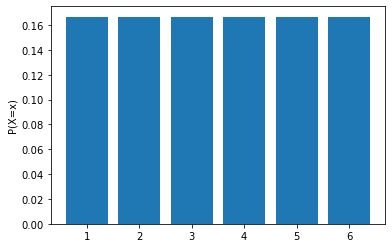

In [9]:
# 全事象を指定
num = np.arange(1, 7, 1)

# 離散一様分布
prob = []
for i in num:
    value = 1 / len(num)
    prob.append(value)

# 可視化
plt.bar(num, prob)
plt.xticks(num)
plt.ylabel('P(X=x)')
plt.show()

### ベルヌーイ分布
コインを１回投げる結果を確率変数$X$で表し, 裏を$X=0$, 表を$X=1$のようにします. 表が出る確率が$P(X=1)=\theta$とすると, $X$の分布は
$$
P(X=0)=\theta^x (1-\theta)^{1-x}
$$

となり, このとき$X$は**ベルヌーイ分布**(*Bernoulli destribution*)に従う.

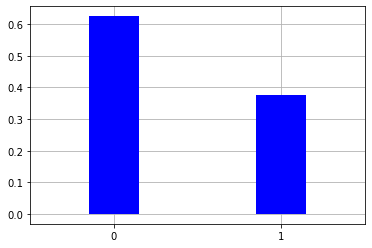

In [11]:
x = np.array([0,0,1,1,0,1,0,0])

# ベルヌーイ分布を計算
p = len(x[x==1]) / len(x)
pmf_bernoulli = stats.bernoulli.pmf(x, p)

# 可視化
plt.vlines(x, 0, pmf_bernoulli, 
           colors='blue', lw=50)
plt.xticks([0,1])
plt.xlim([0 - 0.5, 1 + 0.5])
plt.grid(True)

### 二項分布
コインを1回ではなく, 複数回連続して投げて, 表が出た回数を記録する実験を考えます. 

$n$回のコイン投げで表が$x$回出る確率が与えられ, こうして得られる分布を**二項分布**(*Binomial distribution*)と呼びます.

$$
P(X=x)= {}_n C _x \theta^x (1 - \theta)^{n-x}
$$

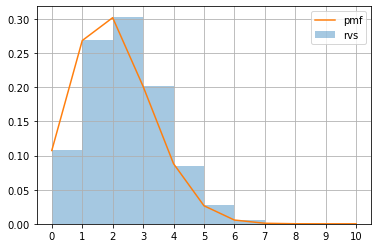

In [15]:
import seaborn as sns
# 疑似乱数を生成
np.random.seed(1)
rvs_binom = stats.binom.rvs(n=10, p=0.2, size=10000)

# 二項分布を取得
m = np.arange(0, 10+1, 1)
pmf_binom = stats.binom.pmf(n=10, p=0.2, k=m)

# 可視化
sns.distplot(rvs_binom, bins=m, 
             kde=False, norm_hist=True, label='rvs')
plt.plot(m, pmf_binom, label='pmf')
plt.xticks(m)
plt.legend()
plt.grid()

### 正規分布
平均$\mu$と分散$\sigma$の二つのパラメータを持った次のような式で表される.
$$
f(x) = \frac{1}{\sqrt{2\pi \sigma^2}} \exp \left(-\frac{(x - \mu)^2}
{2\sigma^2} \right) \hspace{20px} (-\infty < x < \infty)

$$

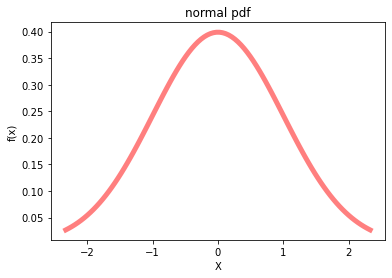

In [17]:
from scipy.stats import norm

# mean
mu = 0

# standard deviation
sd = 1

# range
x = np.linspace(norm.ppf(0.01, loc=mu, scale=sd), norm.ppf(0.99, loc=mu, scale=sd), 100)

# visualize
fig, ax = plt.subplots(1,1)
ax.plot(x, norm.pdf(x, loc=mu, scale=sd), 'r-', lw=5, alpha=0.5)
ax.set_xlabel('X')
ax.set_ylabel('f(x)')
ax.set_title('normal pdf')
plt.show()

# 参考文献
- 大塚淳(2020) 『統計学を哲学する』名古屋大学出版会.
- 南風原朝和(2002)『心理統計学の基礎―統合的理解のために』有斐閣アルマ.